# Analysis of Philippine Stock Exchange index 
The Philippine Stock Exchange Index (PSEi) is the primary index of the Philippine Stock Exchange, consisting of 30 top companies selected based on specific criteria to represent the overall market performance. This index offers a snapshot of market conditions by tracking changes in the stock prices of these key companies. 

These 30 companies are group into one of the six sub-indices that provide a useful measurement of the sectoral performance, i.e, financial index, industrial index, holding firms index, property index, service index, and mining & oil index. 

The data for this analysis is sourced from Yahoo Financ. The data is a time series spanning from June 18, 2023, to June 18, 2024. It contains some missing values.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
df = pd.read_csv('/kaggle/input/stock-data-psei-1-year/PSEI.PS.csv', index_col = 0, parse_dates = True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-19,6491.850098,6491.850098,6422.109863,6450.339844,6450.339844,96000.0
2023-06-20,6434.029785,6448.899902,6410.330078,6448.899902,6448.899902,116400.0
2023-06-21,6420.799805,6437.399902,6406.879883,6424.209961,6424.209961,126300.0
2023-06-22,6423.060059,6423.060059,6374.069824,6404.910156,6404.910156,130700.0
2023-06-23,6404.379883,6421.779785,6392.629883,6393.549805,6393.549805,67400.0
...,...,...,...,...,...,...
2024-06-11,6456.850098,6464.259766,6410.069824,6410.069824,6410.069824,55000.0
2024-06-12,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-13,6428.279785,6446.060059,6390.830078,6390.830078,6390.830078,76800.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2023-06-19 to 2024-06-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       242 non-null    float64
 1   High       242 non-null    float64
 2   Low        242 non-null    float64
 3   Close      242 non-null    float64
 4   Adj Close  242 non-null    float64
 5   Volume     242 non-null    float64
dtypes: float64(6)
memory usage: 14.3 KB


By using the info function of the DataFrame object, we can see that there are missing values. Out of 261 entries, there are 242 non-null counts for each variable. We will use forward filling. This involves filling missing values with the last available value in the column. This can be done using the ffill() method in pandas, which propagates the next valid observation forward to replace NaNs. foreward filling is a good choice since the data is a time series, and it is suitable fore data with short gaps. 

In [3]:
df = df.bfill()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-19,6491.850098,6491.850098,6422.109863,6450.339844,6450.339844,96000.0
2023-06-20,6434.029785,6448.899902,6410.330078,6448.899902,6448.899902,116400.0
2023-06-21,6420.799805,6437.399902,6406.879883,6424.209961,6424.209961,126300.0
2023-06-22,6423.060059,6423.060059,6374.069824,6404.910156,6404.910156,130700.0
2023-06-23,6404.379883,6421.779785,6392.629883,6393.549805,6393.549805,67400.0
...,...,...,...,...,...,...
2024-06-11,6456.850098,6464.259766,6410.069824,6410.069824,6410.069824,55000.0
2024-06-12,6428.279785,6446.060059,6390.830078,6390.830078,6390.830078,76800.0
2024-06-13,6428.279785,6446.060059,6390.830078,6390.830078,6390.830078,76800.0


## Moving Average
Moving Average (MA) is a statistical calculation used to analyze data points by creating a series of averages of different subsets of the full data set. It is commonly used to smooth out short-term fluctuations to highlight long-term trends. The two common moving average algorithms are simple moving average (SMA) and exponential moving average (EMA). 

Looking at the graph, we can see a steady increase in price starting from the last quarter of 2023 to the end of April 2024. However, there is an onset of decline throughout the second quarter of 2024. The former indicates a bullish market sentiment, while the latter indicates a bearish market sentiment. 




In [4]:
MA = pd.DataFrame()
MA['MA_20'] = df['Close'].rolling(window=20).mean()
MA['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

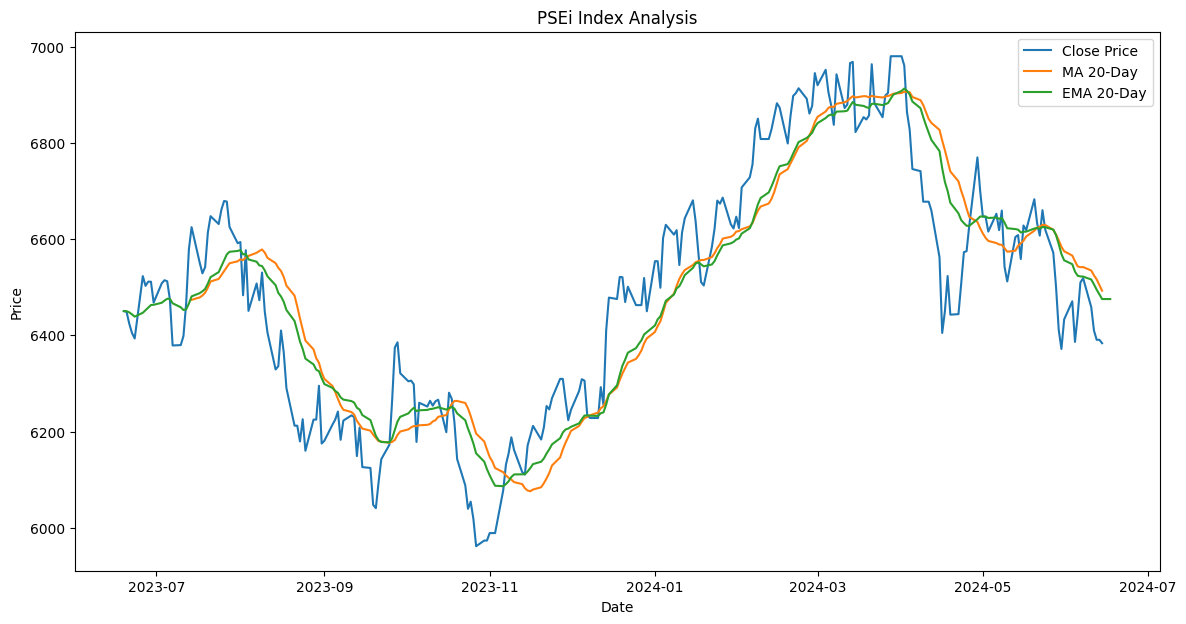

In [5]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Plotting Close price and Moving Averages
sns.lineplot(x=df.index, y=df['Close'], label='Close Price')
sns.lineplot(x=df.index, y=MA['MA_20'], label='MA 20-Day')
sns.lineplot(x=df.index, y=MA['EMA_20'], label='EMA 20-Day')


# Customize labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PSEi Index Analysis')

# Show legend
plt.legend()

# Display the plot
plt.show()


## Stock Returns
Stock return is a measure of the profit or loss generated by an investment in a stock over a specific period. Log return is another way to measure the rate of return on an investment.  It is calculated using the logarithm of the ratio of consecutive prices. Log return is prefered in financial analysis because log returns are often assumed to be normally distributed, which simplifies statistical analysis and modeling. 

Looking at the graph of daily return agains time, over a one year period, we can see that the maximum increase in the closing price is around 150 PHP, while the maximum decrease in closing price is also around 150 PHP. 

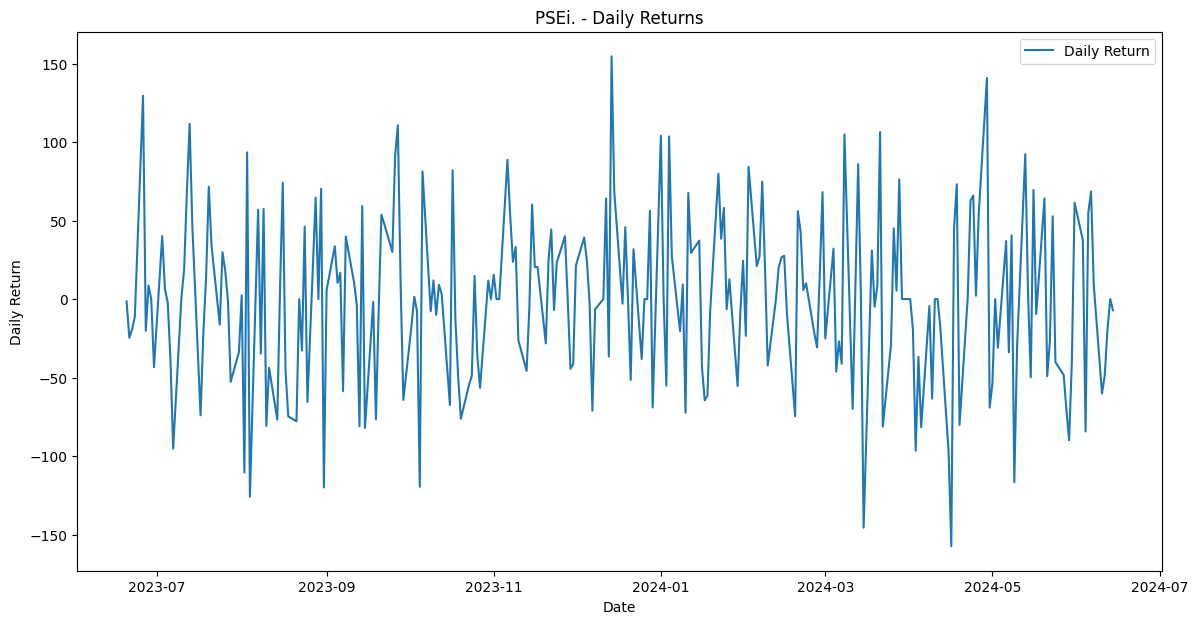

In [6]:
SR = pd.DataFrame()
SR['Daily Return'] = df['Close'].diff()

# Plot log returns
plt.figure(figsize=(14, 7))
plt.plot(SR['Daily Return'], label='Daily Return')
plt.title('PSEi. - Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

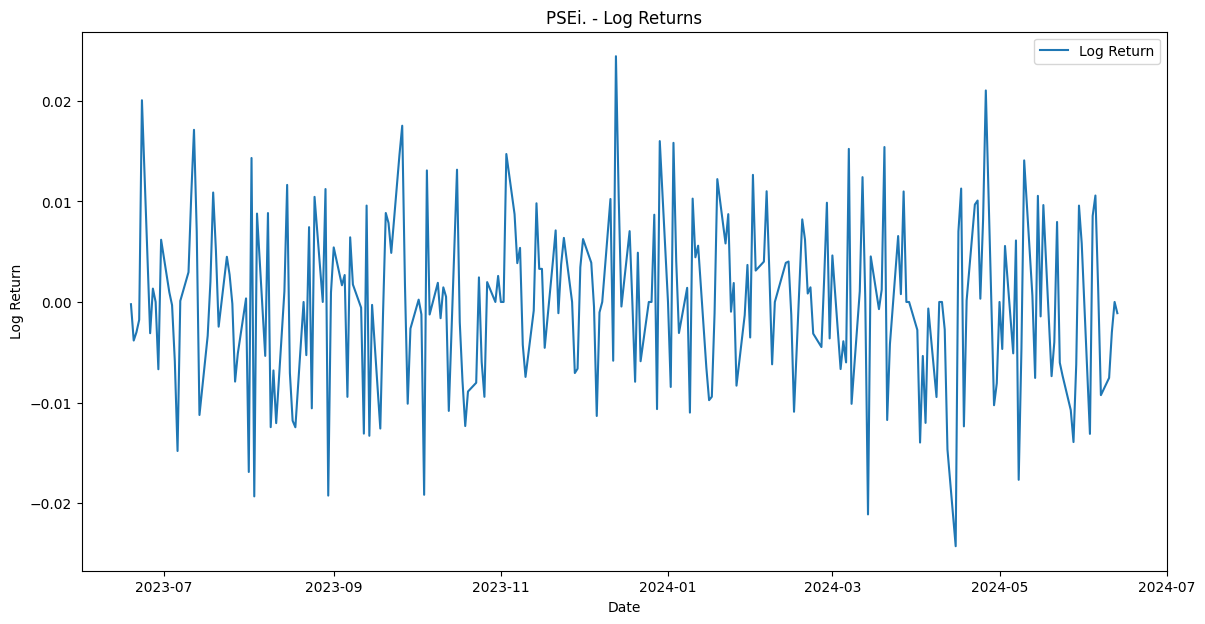

In [7]:
SR['Log Return'] = np.log(df['Close']).shift(-1) - np.log(df['Close'])

# Plot log returns
plt.figure(figsize=(14, 7))
plt.plot(SR['Log Return'], label='Log Return')
plt.title('PSEi. - Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()

## Volatility
Volatility measures how much a stock's price fluctuates over time, usually using the standard deviation of returns. Here, we will use log returns to calculate it. High volatility means the stock price can change dramatically in a short period, indicating higher risk. This is often seen as sharp ups and downs in the stock price, with steeper slopes in the price movements. Low volatility, meanwhile, indicates that the price of the stock remains relatively stable. 

Based on the computation, the volatility, calculated as the standard deviation of log returns, is 0.00832805335194899. This relatively low volatility indicates that, mostly, the stock price does not exhibit large changes from one day to the next, suggesting stable and predictable price movements.

Looking at the histogram of the log returns, we can see that the data are more centered around zero and that it has a relatively low variability. 

In [8]:
# Calculate volatility as the standard deviation of daily returns
volatility = SR['Log Return'].std()
print(f'Volatility (Standard Deviation of Log Returns): {volatility}')



Volatility (Standard Deviation of Log Returns): 0.00832805335194899


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


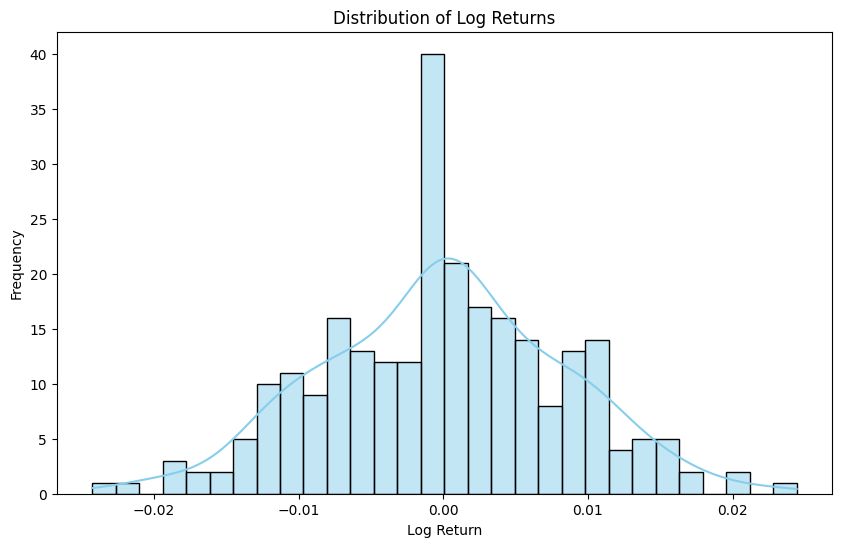

In [9]:


# Remove NaN values from the last row
SR = SR.iloc[:-1]

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=SR['Log Return'], kde=True, bins=30, color='skyblue', edgecolor='black')

# Customize labels and title
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.title('Distribution of Log Returns')

# Display the plot
plt.show()


### Probability of the stock price will drop over a certain period
Given that the distribution of log returns is approximately normally distributed, the following observations are made: 

-There is a significantly low propability that the stock price will drob by over 5% over a certain day. 

-The probability that the stock price will drop over 40% in 10 days is  7.781357905257163e-05.

-The probability that the stock price will drop over 40% in 220 days is  0.0007706339179157312

In [10]:
# Calculating the probability of the stock price will drop
#drop over a certain percentage in a day. 
mu = SR['Log Return'].mean()
sigma = SR['Log Return'].std(ddof=1)

# decrease by 5% in a day
prob = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob)


The Probability is  9.927465866353298e-10


In [11]:
# drop over 40% in 10 days
mu10 = 10*mu
sigma10 = (10**0.5) * sigma
print('The probability of dropping over 40% in 10 days is ', norm.cdf(-0.1, mu10, sigma10))

The probability of dropping over 40% in 10 days is  7.781357905257163e-05


In [12]:
# drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.0007706339179157312


## Bolinger Bands
Bollinger Bands are a technical analysis tool consisting of a middle band (20-day simple moving average) and two outer bands (two standard deviations above and below the middle band) that measure a stock's volatility. These allow us to identify potential overbought and oversold conditions. 

Looking at the graph, we can observe that from the beginning of  April 2024 to second week of June 2024 the width of the bands is higher. This indicates a higher volatility of the stock price. 

Additioanally, during the month of September, the stock price is near the lower band. This indicate that the stock is oversold and subject to potential buying opportunity or a bounce back. "Overbought" refers to a condition where a stock's price has risen significantly and rapidly, suggesting it may be overvalued and a price correction could be imminent. Conversely, "oversold" refers to a condition where a stock's price has fallen sharply, indicating it may be undervalued and a price rebound could be likely. Indeed, in the succeeding month, the stock experience a short period of bounce back. Meanwhile, during the the start of 2024 until April, the stock price is consistently moving along the upper band. This suggest a strong uptrend. 

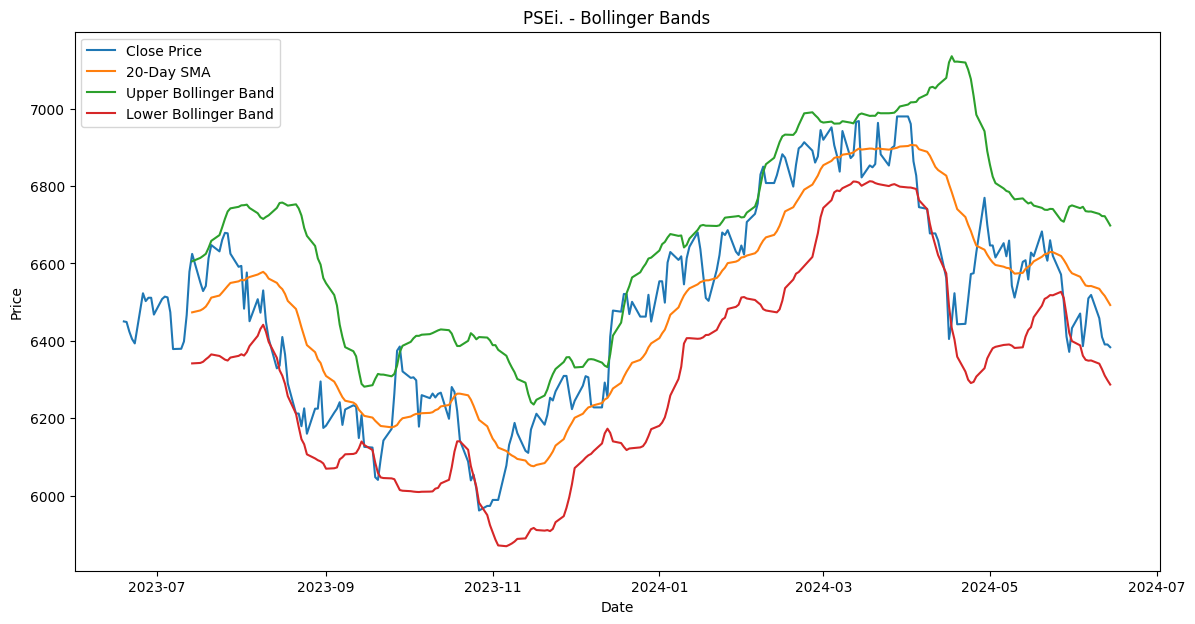

In [13]:
BB = pd.DataFrame()
# Calculate Bollinger Bands
BB['SMA_20'] = df['Close'].rolling(window=20).mean()
BB['BB_upper'] = BB['SMA_20'] + (df['Close'].rolling(window=20).std() * 2)
BB['BB_lower'] = BB['SMA_20'] - (df['Close'].rolling(window=20).std() * 2)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(BB['SMA_20'], label='20-Day SMA')
plt.plot(BB['BB_upper'], label='Upper Bollinger Band')
plt.plot(BB['BB_lower'], label='Lower Bollinger Band')
plt.title('PSEi. - Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Volume Analysis
Volume is the total number of shares or contracts traded for a particular stock within a given period. High volume indicates high trading activity. This is an indicator of a strong interest or momentum in the stock, while low volume indicates less interest. In the context of stock indices, such as the PSEi, volume represents the aggregated volume of all the stocks included in the index.

Based on the result, during September 4, 2023, the volume is at the highest. Prior to this, the stocks traded was already high during the onset of September. 

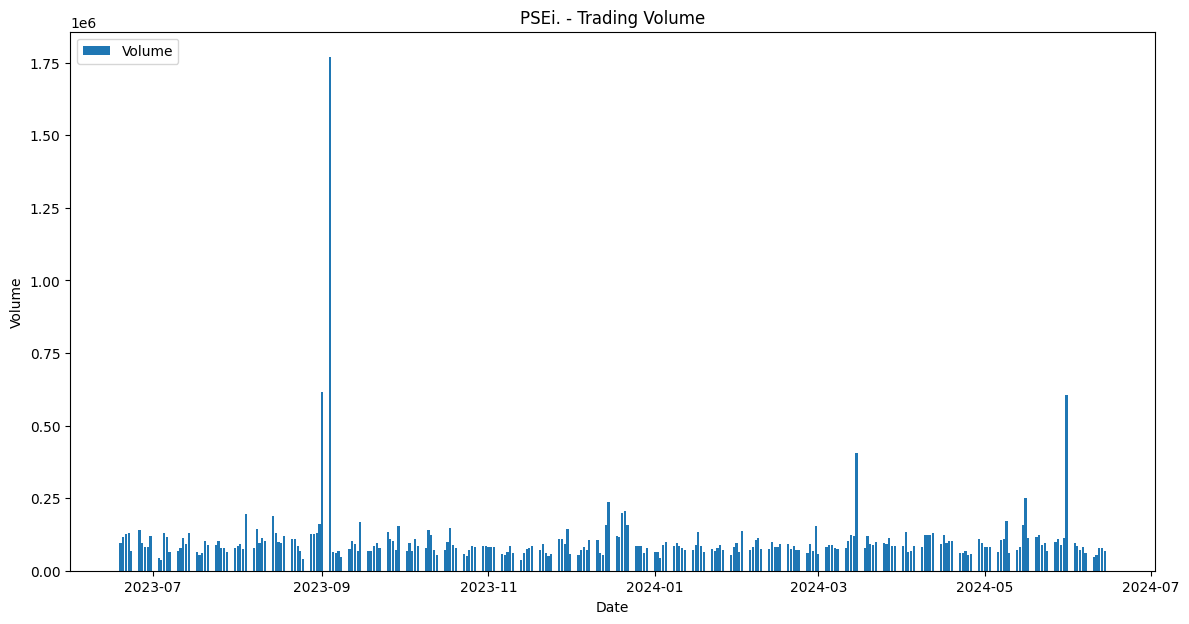

In [14]:
# Plot trading volume
plt.figure(figsize=(14, 7))
plt.bar(df.index, df['Volume'], label='Volume')
plt.title('PSEi. - Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


In [15]:
volume5 = df['Volume'].nlargest(5)
print(f"Days with highest volume {volume5}")

Days with highest volume Date
2023-09-04    1768700.0
2023-09-01     616700.0
2024-05-31     606500.0
2024-03-15     405500.0
2024-05-16     251000.0
Name: Volume, dtype: float64
